In [6]:
%%capture
! pip install lifelines
! pip install scikit-survival

In [1]:
import pandas as pd
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
plt.rcParams["font.family"] = "serif"

In [2]:
scratch = []
bmmae_full = []
bmmae_froze = []
for i in range(5):
    scratch.append(pd.read_csv(f'survival_scores/risks_{i}_scratch=True_froze=False.csv'))
    bmmae_full.append(pd.read_csv(f'survival_scores/risks_{i}_scratch=False_froze=False.csv'))
    bmmae_froze.append(pd.read_csv(f'survival_scores/risks_{i}_scratch=False_froze=True.csv'))

scratch = pd.concat(scratch).reset_index(drop=True)
bmmae_full = pd.concat(bmmae_full).reset_index(drop=True)
bmmae_froze = pd.concat(bmmae_froze).reset_index(drop=True)

# SANTITY CHECK
print(scratch.time.equals(scratch.time_loop))
print(bmmae_full.time.equals(bmmae_full.time_loop))
print(bmmae_froze.time.equals(bmmae_froze.time_loop))

print(scratch.event.equals(scratch.event_loop))
print(bmmae_full.event.equals(bmmae_full.event_loop))
print(bmmae_froze.event.equals(bmmae_froze.event_loop))

print(bmmae_froze.time.equals(scratch.time))
print(bmmae_full.time.equals(scratch.time))
print(bmmae_froze.time.equals(bmmae_full.time))

True
True
True
True
True
True
True
True
True


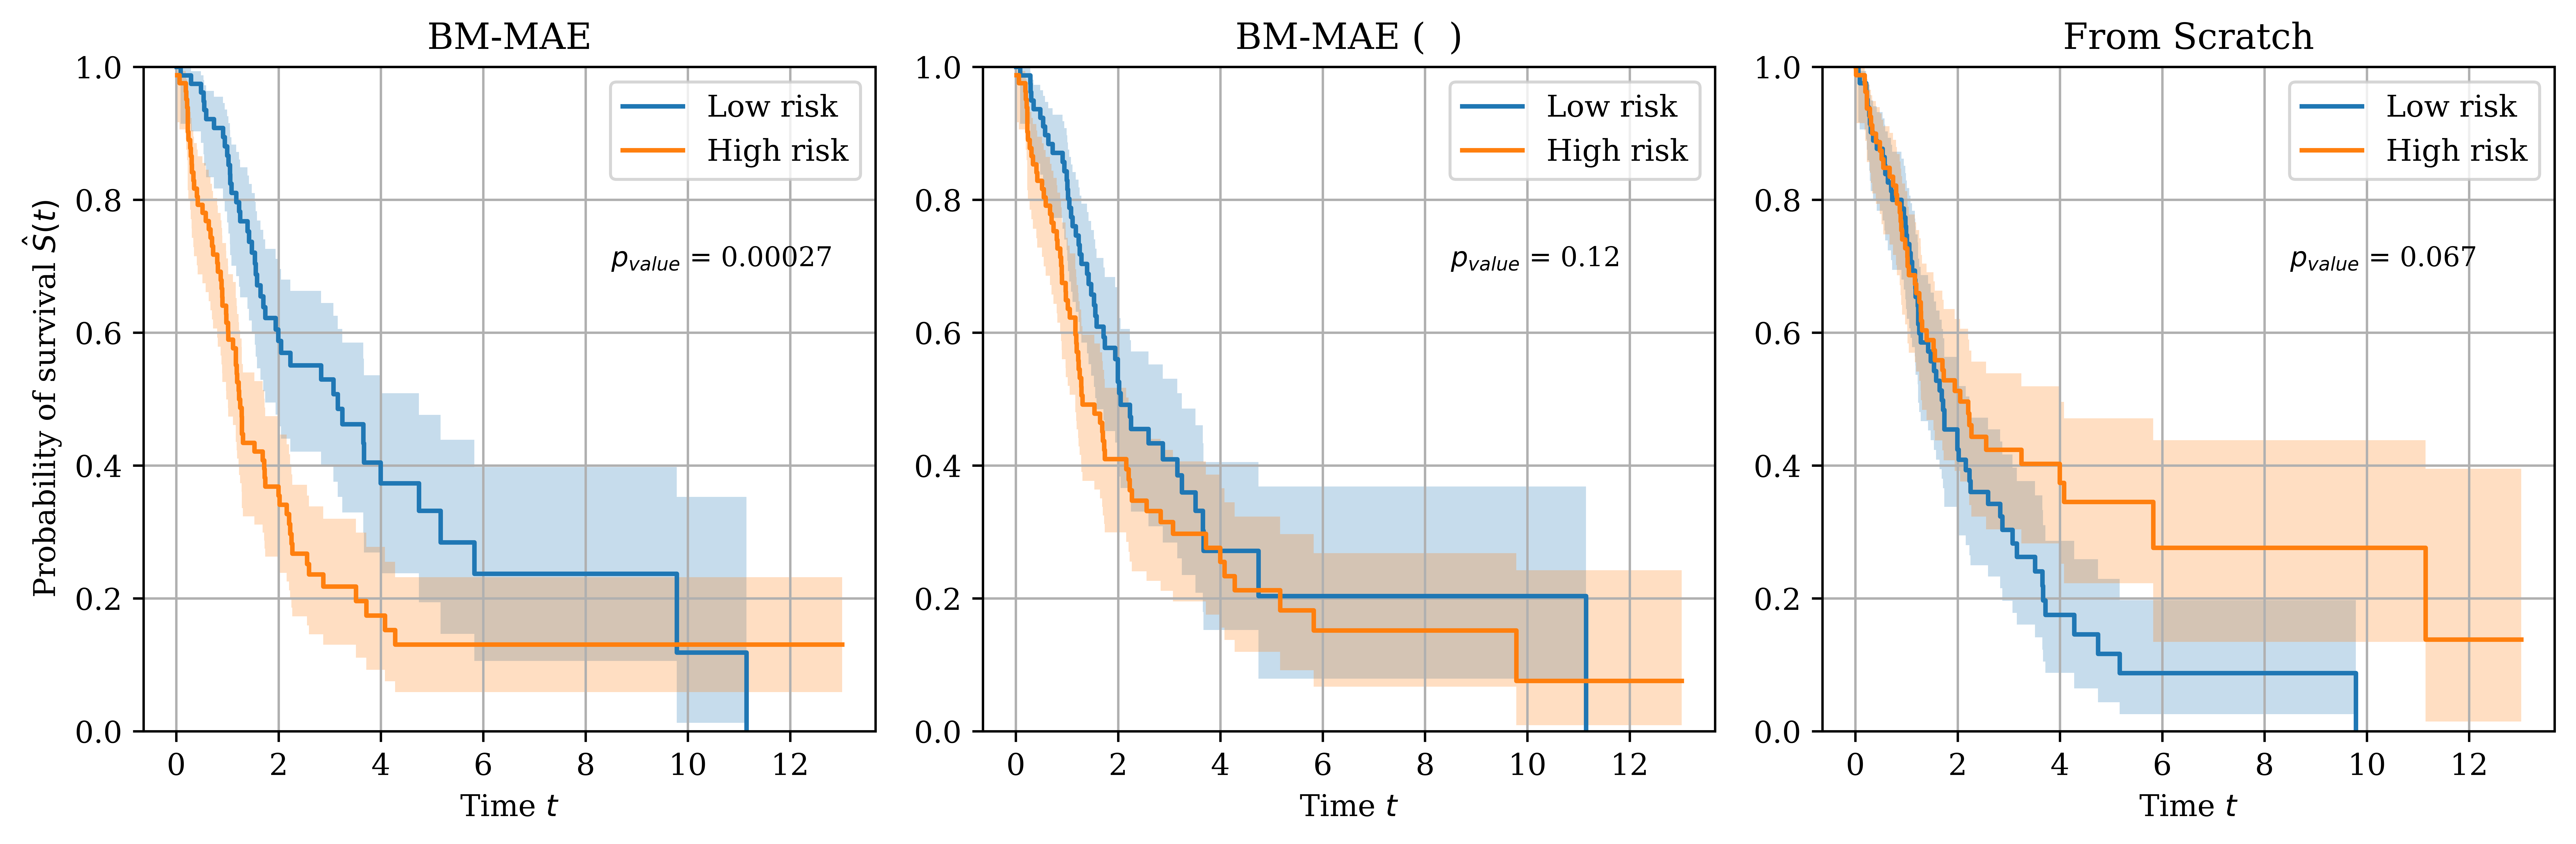

In [39]:
bmmae_full_high = bmmae_full[bmmae_full.risk > bmmae_full.risk.median()]
bmmae_full_low = bmmae_full[bmmae_full.risk <= bmmae_full.risk.median()]

results = logrank_test(bmmae_full_high["time"], bmmae_full_low["time"], bmmae_full_high["event"], bmmae_full_low["event"])
fig, axes = plt.subplots(1, 3, dpi=1000, figsize=(12,4))
p_value = results.p_value
time, survival_prob, conf_int = kaplan_meier_estimator(
                bmmae_full_low["event"].astype(bool),
                bmmae_full_low["time"],
                conf_type="log-log",
            )

axes[0].step(time, survival_prob, where="post", label=f"Low risk")
axes[0].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
time, survival_prob, conf_int = kaplan_meier_estimator(
                bmmae_full_high["event"].astype(bool),
                bmmae_full_high["time"],
                conf_type="log-log",
            )

axes[0].step(time, survival_prob, where="post", label=f"High risk")
axes[0].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
axes[0].set_ylim(0, 1)
axes[0].set_ylabel(r"Probability of survival $\hat{S}(t)$")
axes[0].set_xlabel("Time $t$")    
axes[0].legend(loc="best")
axes[0].set_title('BM-MAE')
p_value = f'{p_value:0.2}'
axes[0].text(8.5,0.7,r'$p_{value}$ = '+p_value, fontsize=9)
axes[0].grid()



bmmae_froze_high = bmmae_froze[bmmae_froze.risk > bmmae_froze.risk.median()]
bmmae_froze_low = bmmae_froze[bmmae_froze.risk <= bmmae_froze.risk.median()]

results = logrank_test(bmmae_froze_high["time"], bmmae_froze_low["time"], bmmae_froze_high["event"], bmmae_froze_low["event"])

p_value = results.p_value
time, survival_prob, conf_int = kaplan_meier_estimator(
                bmmae_froze_low["event"].astype(bool),
                bmmae_froze_low["time"],
                conf_type="log-log",
            )

axes[1].step(time, survival_prob, where="post", label=f"Low risk")
axes[1].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
time, survival_prob, conf_int = kaplan_meier_estimator(
                bmmae_froze_high["event"].astype(bool),
                bmmae_froze_high["time"],
                conf_type="log-log",
            )

axes[1].step(time, survival_prob, where="post", label=f"High risk")
axes[1].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
axes[1].set_ylim(0, 1)
#axes[1].set_ylabel(r"Probability of survival $\hat{S}(t)$")
axes[1].set_xlabel("Time $t$")    
axes[1].legend(loc="best")
axes[1].set_title("BM-MAE (  )")
p_value = f'{p_value:0.2}'
axes[1].text(8.5,0.7,r'$p_{value}$ = '+p_value, fontsize=9)
axes[1].grid()


scratch_high = scratch[scratch.risk > scratch.risk.median()]
scratch_low = scratch[scratch.risk <= scratch.risk.median()]

results = logrank_test(scratch_high["time"], scratch_low["time"], scratch_high["event"], scratch_low["event"])

p_value = results.p_value
time, survival_prob, conf_int = kaplan_meier_estimator(
                scratch_low["event"].astype(bool),
                scratch_low["time"],
                conf_type="log-log",
            )

axes[2].step(time, survival_prob, where="post", label=f"Low risk")
axes[2].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
time, survival_prob, conf_int = kaplan_meier_estimator(
                scratch_high["event"].astype(bool),
                scratch_high["time"],
                conf_type="log-log",
            )

axes[2].step(time, survival_prob, where="post", label=f"High risk")
axes[2].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
axes[2].set_ylim(0, 1)
axes[2].set_xlabel("Time $t$")    
axes[2].legend(loc="best")
p_value = f'{p_value:0.2}'
axes[2].set_title('From Scratch')
axes[2].text(8.5,0.7,r'$p_{value}$ = '+p_value, fontsize=9)
axes[2].grid()
plt.tight_layout()

# Save as PDF with tight bounding box
plt.savefig("survival_ex.jpg", bbox_inches='tight')